In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, learning_curve,  cross_val_score, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.preprocessing import KBinsDiscretizer
# from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.preprocessing import StandardScaler, RobustScaler

In [3]:
df = pd.read_csv('UNSW_low.csv')

C:\Users\moinu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1.0,0.000011,udp,-,INT,2.0,0.0,496.0,0.0,90909.0902,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
1,2.0,0.000008,udp,-,INT,2.0,0.0,1762.0,0.0,125000.0003,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
2,3.0,0.000005,udp,-,INT,2.0,0.0,1068.0,0.0,200000.0051,...,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,Normal,0.0
3,4.0,0.000006,udp,-,INT,2.0,0.0,900.0,0.0,166666.6608,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0
4,5.0,0.000010,udp,-,INT,2.0,0.0,2126.0,0.0,100000.0025,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,Normal,0.0
82328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,3.0,2.0,0.0,Normal,0.0
82329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,Normal,0.0
82330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,Normal,0.0


In [5]:
df.label.value_counts()

1.0    45332
0.0    36542
Name: label, dtype: int64

In [6]:
df.isnull().sum().sum()

1659893

In [7]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [8]:
df.shape

(82332, 45)

In [9]:
df.replace([np.inf,-np.inf], np.nan, inplace = True)

In [10]:
df.dropna(inplace = True)

In [11]:
df.reset_index(inplace = True)

In [12]:
df = df.drop('index', axis = 1)

In [13]:
df = df.drop('id', axis = 1)

In [14]:
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2.0,0.0,496.0,0.0,90909.090200,254.0,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
1,0.000008,udp,-,INT,2.0,0.0,1762.0,0.0,125000.000300,254.0,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
2,0.000005,udp,-,INT,2.0,0.0,1068.0,0.0,200000.005100,254.0,...,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,Normal,0.0
3,0.000006,udp,-,INT,2.0,0.0,900.0,0.0,166666.660800,254.0,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0
4,0.000010,udp,-,INT,2.0,0.0,2126.0,0.0,100000.002500,254.0,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25342,0.336323,tcp,-,FIN,28.0,28.0,4880.0,2976.0,163.533273,31.0,...,1.0,3.0,0.0,0.0,0.0,5.0,6.0,0.0,Normal,0.0
25343,0.516020,tcp,-,FIN,103.0,102.0,6388.0,8634.0,395.333514,31.0,...,1.0,1.0,0.0,0.0,0.0,5.0,6.0,0.0,Normal,0.0
25344,1.090123,tcp,http,FIN,12.0,18.0,1580.0,10168.0,26.602501,31.0,...,1.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,Normal,0.0
25345,0.207524,tcp,-,FIN,72.0,74.0,4238.0,65118.0,698.714360,31.0,...,1.0,2.0,0.0,0.0,0.0,5.0,11.0,0.0,Normal,0.0


In [15]:
df.label

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
25342    0.0
25343    0.0
25344    0.0
25345    0.0
25346    0.0
Name: label, Length: 25347, dtype: float64

In [18]:
df.label.value_counts()

1    23117
0     2230
Name: label, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_features = df.columns.tolist()

for each in categorical_features:
    df[each] = encoder.fit_transform(df[each])

In [20]:
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,11,117,0,3,1,0,127,0,7342,8,...,0,1,0,0,0,0,1,0,6,0
1,8,117,0,3,1,0,682,0,7345,8,...,0,1,0,0,0,0,1,0,6,0
2,5,117,0,3,1,0,393,0,7348,8,...,0,2,0,0,0,0,2,0,6,0
3,6,117,0,3,1,0,309,0,7347,8,...,0,2,0,0,0,1,2,0,6,0
4,10,117,0,3,1,0,793,0,7343,8,...,0,2,0,0,0,1,2,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25342,2397,111,0,2,23,22,1217,934,5918,4,...,0,2,0,0,0,4,5,0,6,0
25343,3157,111,0,2,64,60,1313,1368,6185,4,...,0,0,0,0,0,4,5,0,6,0
25344,5318,111,5,2,11,15,618,1431,2228,4,...,0,0,0,0,1,1,0,0,6,0
25345,1575,111,0,2,48,46,1159,1871,6258,4,...,0,1,0,0,0,4,10,0,6,0


In [21]:
features = df.drop(['label'], axis = 1)
target = df['label']

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

In [23]:
df_scaled_features = pd.DataFrame(scaled_features, columns = features.columns)
df_scaled_features

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.001500,0.900000,0.000000,0.6,0.004255,0.000000,0.059374,0.000000,0.998640,0.888889,...,0.000000,0.0,0.017857,0.0,0.0,0.0,0.000000,0.017857,0.0,0.666667
1,0.001091,0.900000,0.000000,0.6,0.004255,0.000000,0.318841,0.000000,0.999048,0.888889,...,0.000000,0.0,0.017857,0.0,0.0,0.0,0.000000,0.017857,0.0,0.666667
2,0.000682,0.900000,0.000000,0.6,0.004255,0.000000,0.183731,0.000000,0.999456,0.888889,...,0.000000,0.0,0.035714,0.0,0.0,0.0,0.000000,0.035714,0.0,0.666667
3,0.000818,0.900000,0.000000,0.6,0.004255,0.000000,0.144460,0.000000,0.999320,0.888889,...,0.020408,0.0,0.035714,0.0,0.0,0.0,0.020408,0.035714,0.0,0.666667
4,0.001364,0.900000,0.000000,0.6,0.004255,0.000000,0.370734,0.000000,0.998776,0.888889,...,0.020408,0.0,0.035714,0.0,0.0,0.0,0.020408,0.035714,0.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25342,0.326923,0.853846,0.000000,0.4,0.097872,0.092437,0.568957,0.424739,0.804951,0.444444,...,0.000000,0.0,0.035714,0.0,0.0,0.0,0.081633,0.089286,0.0,0.666667
25343,0.430578,0.853846,0.000000,0.4,0.272340,0.252101,0.613838,0.622101,0.841268,0.444444,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.081633,0.089286,0.0,0.666667
25344,0.725314,0.853846,0.416667,0.4,0.046809,0.063025,0.288920,0.650750,0.303047,0.444444,...,0.000000,0.0,0.000000,0.0,0.0,0.2,0.020408,0.000000,0.0,0.666667
25345,0.214812,0.853846,0.000000,0.4,0.204255,0.193277,0.541842,0.850841,0.851197,0.444444,...,0.000000,0.0,0.017857,0.0,0.0,0.0,0.081633,0.178571,0.0,0.666667


In [24]:
new_dataset = pd.concat([df_scaled_features,target], axis = 1)

In [25]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25347 entries, 0 to 25346
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                25347 non-null  float64
 1   proto              25347 non-null  float64
 2   service            25347 non-null  float64
 3   state              25347 non-null  float64
 4   spkts              25347 non-null  float64
 5   dpkts              25347 non-null  float64
 6   sbytes             25347 non-null  float64
 7   dbytes             25347 non-null  float64
 8   rate               25347 non-null  float64
 9   sttl               25347 non-null  float64
 10  dttl               25347 non-null  float64
 11  sload              25347 non-null  float64
 12  dload              25347 non-null  float64
 13  sloss              25347 non-null  float64
 14  dloss              25347 non-null  float64
 15  sinpkt             25347 non-null  float64
 16  dinpkt             253

In [26]:
new = new_dataset.to_csv(r'preprocessed_unsw2.csv', encoding = 'utf-8', index = False)

In [27]:
df = pd.read_csv('preprocessed_unsw2.csv')

In [28]:
features = df.drop('label', axis = 1)
target = df['label']

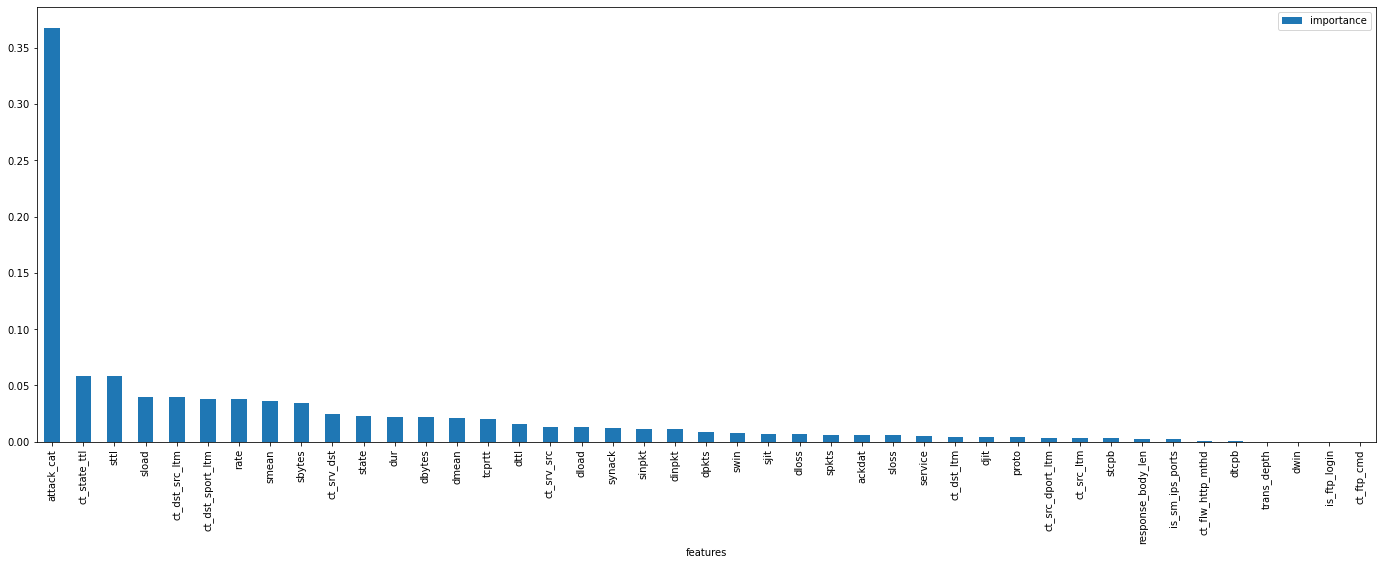

In [37]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier();

# # fit random forest classifier on the training set
# rfc.fit(features, target);
# # extract important features
# score = np.round(rfc.feature_importances_,3)
# importances = pd.DataFrame({'features':features.columns,'importance':score})
# importances = importances.sort_values('importance',ascending=False).set_index('features')
# # plot importances
# plt.rcParams['figure.figsize'] = (24, 8)
# importances.plot.bar();

## Apply ML

In [29]:
results_test = {}
results_train = {}
list_algos=[]

def predict(algo_name,X_train,y_train,X_test,y_test, atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("Training Accuracy: " + str(acc_train))
        print("Testing  Accuracy: "+ str(acc_val))
    else:
        return Y_pred

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((20277, 43), (20277,))

In [34]:
# KNN

knneig = KNeighborsClassifier(n_neighbors=5)
knneig.fit(X_train, y_train)
# pred_knneigh = knneig.predict(X_test1)
# score_knneigh_before = accuracy_score(y_test, pred_knneigh)
# print(score_knneigh_before)
predict(knneig,X_train,y_train,X_test,y_test)
print(classification_report(y_test, knneig.predict(X_test)))

Training Accuracy: 99.75
Testing  Accuracy: 99.68
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       405
           1       1.00      1.00      1.00      4665

    accuracy                           1.00      5070
   macro avg       1.00      0.98      0.99      5070
weighted avg       1.00      1.00      1.00      5070



In [41]:
#RF

# rf = RandomForestClassifier(n_estimators=250, random_state = 42)
# predict(rf,X_train,y_train,X_test,y_test)
# print(classification_report(y_test, rf.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       1.00      1.00      1.00      9049

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467



In [35]:
#LR

lr = LogisticRegression(solver='lbfgs')
predict(lr,X_train,y_train,X_test,y_test)
print(classification_report(y_test, lr.predict(X_test)))

Training Accuracy: 99.36
Testing  Accuracy: 99.53
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       405
           1       0.99      1.00      1.00      4665

    accuracy                           1.00      5070
   macro avg       1.00      0.97      0.98      5070
weighted avg       1.00      1.00      1.00      5070



In [43]:
# GBC

gbc = GradientBoostingClassifier()
predict(gbc,X_train,y_train,X_test,y_test)
print(classification_report(y_test, gbc.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       1.00      1.00      1.00      9049

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467



In [44]:
# ADA

ada = AdaBoostClassifier()
predict(ada,X_train,y_train,X_test,y_test)
print(classification_report(y_test, ada.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       1.00      1.00      1.00      9049

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467



In [45]:
# DT

dt = DecisionTreeClassifier()
predict(dt,X_train,y_train,X_test,y_test)
print(classification_report(y_test, dt.predict(X_test)))

Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       1.00      1.00      1.00      9049

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467



In [46]:
#GaussianNB

nb = GaussianNB()
predict(nb,X_train,y_train,X_test,y_test)
print(classification_report(y_test, nb.predict(X_test)))

Training Accuracy: 95.15
Testing  Accuracy: 95.11
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      7418
           1       0.92      1.00      0.96      9049

    accuracy                           0.95     16467
   macro avg       0.96      0.95      0.95     16467
weighted avg       0.96      0.95      0.95     16467



In [47]:
#xgb

xg = xgb.XGBClassifier()
predict(xg,X_train,y_train,X_test,y_test)
print(classification_report(y_test, xg.predict(X_test)))

[13:30:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\moinu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Accuracy: 100.0
Testing  Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       1.00      1.00      1.00      9049

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467



C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\moinu\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [49]:
#svc

svc = SVC(kernel='linear', probability=True)
predict(svc,X_train,y_train,X_test,y_test)
print(classification_report(y_test, svc.predict(X_test)))

Training Accuracy: 95.19
Testing  Accuracy: 95.1
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      7418
           1       1.00      0.91      0.95      9049

    accuracy                           0.95     16467
   macro avg       0.95      0.96      0.95     16467
weighted avg       0.96      0.95      0.95     16467



In [48]:
#MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)  
predict(mlp,X_train,y_train,X_test,y_test)
print(classification_report(y_test, mlp.predict(X_test)))

Training Accuracy: 99.99
Testing  Accuracy: 99.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       1.00      1.00      1.00      9049

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467



In [51]:
# ROC Curve

r_probs = [0 for _ in range(len(y_test))]
KNN_probs = knneig.predict_proba(X_test)
RF_probs = rf.predict_proba(X_test)
GBC_probs = gbc.predict_proba(X_test)
ADA_probs = ada.predict_proba(X_test)
LR_probs = lr.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)


KNN_probs = KNN_probs[:, 1]
RF_probs = RF_probs[:, 1]
GBC_probs = GBC_probs[:, 1]
LR_probs = LR_probs[:, 1]
ADA_probs = ADA_probs[:, 1]
svc_probs = svc_probs[:, 1]
nb_probs = nb_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
KNN_auc = roc_auc_score(y_test, KNN_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
GBC_auc = roc_auc_score(y_test, GBC_probs)
LR_auc = roc_auc_score(y_test, LR_probs)
ADA_auc = roc_auc_score(y_test, ADA_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
GBC_fpr, GBC_tpr, _ = roc_curve(y_test, GBC_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
ADA_fpr, ADA_tpr, _ = roc_curve(y_test, ADA_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

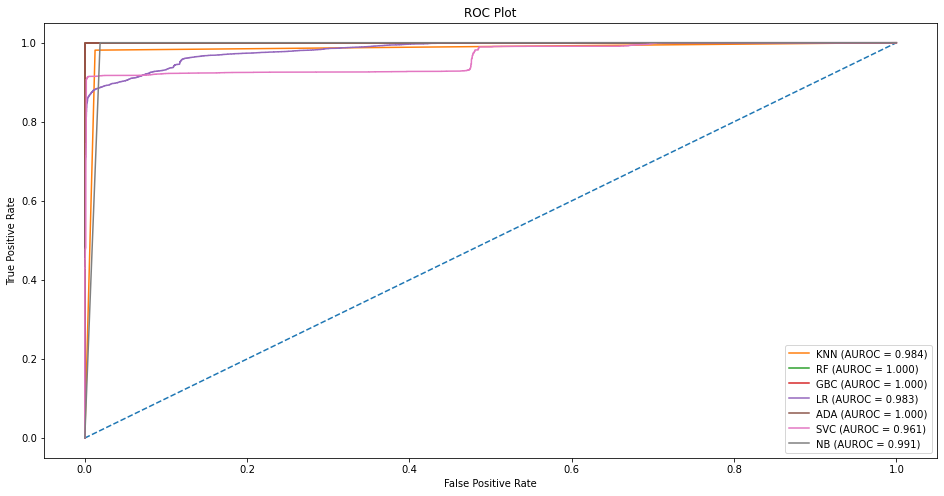

In [53]:
plt.figure(figsize=(16,8))
plt.plot(r_fpr, r_tpr, linestyle='--')
#plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(KNN_fpr, KNN_tpr, label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(RF_fpr, RF_tpr, label='RF (AUROC = %0.3f)' % RF_auc)
plt.plot(GBC_fpr, GBC_tpr, label='GBC (AUROC = %0.3f)' % GBC_auc)
plt.plot(LR_fpr, LR_tpr, label='LR (AUROC = %0.3f)' % LR_auc)
plt.plot(ADA_fpr, ADA_tpr, label='ADA (AUROC = %0.3f)' % ADA_auc)
plt.plot(svc_fpr, svc_tpr, label='SVC (AUROC = %0.3f)' % svc_auc)
plt.plot(nb_fpr, nb_tpr, label='NB (AUROC = %0.3f)' % nb_auc)



# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()